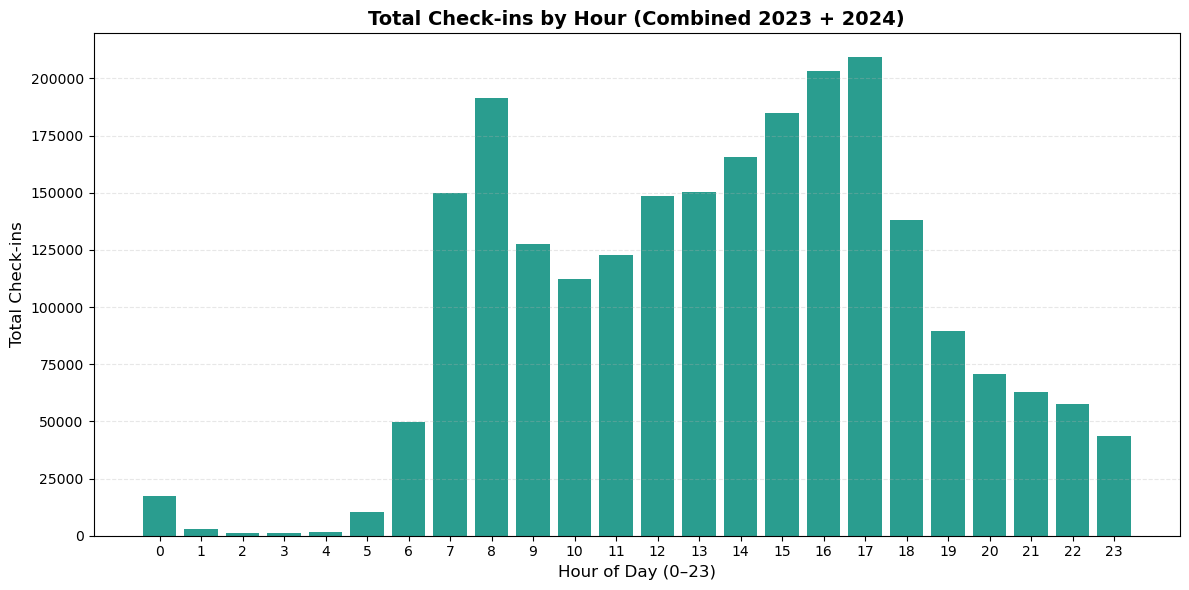

In [1]:

import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

df23 = pd.read_csv(r"C:\Users\inika\OneDrive\Έγγραφα\MSc TIL\Y1\TIL6022\Instappers_per_uur_export_2023.csv")
df24 = pd.read_csv(r"C:\Users\inika\OneDrive\Έγγραφα\MSc TIL\Y1\TIL6022\Instappers_per_uur_export_V3_2024.csv") 



df23["Datum"] = pd.to_datetime(df23["Datum"], format="%d/%m/%Y")
df24["Datum"] = pd.to_datetime(df24["Datum"], format="%d-%m-%Y")

for df in (df23, df24):
    df["Uur"] = df["Uur"].astype(int)
    df["Aantal_check_ins"] = pd.to_numeric(df["Aantal_check_ins"], errors="coerce")

df = pd.concat([df23, df24], ignore_index=True)


hour_totals = df.groupby("Uur", as_index=False)["Aantal_check_ins"].sum().sort_values("Uur")


fig = px.bar(hour_totals, x="Uur", y="Aantal_check_ins",
             labels={"Uur": "Hour of Day (0–23)", "Aantal_check_ins": "Total Check-ins"},
             title="Total Check-ins by Hour (Combined 2023 + 2024)")


fig.update_xaxes(tickmode="array",
                 tickvals=list(range(24)),
                 ticktext=[str(h) for h in range(24)],
                 range=[-0.5, 23.5])


fig.update_traces(text=hour_totals["Aantal_check_ins"].round(0).astype(int),
                  textposition="outside",
                  cliponaxis=False)

fig.show()


plt.figure(figsize=(12, 6))
plt.bar(hour_totals["Uur"], hour_totals["Aantal_check_ins"], color="#2a9d8f", width=0.8)

plt.xticks(range(0, 24))
plt.xlabel("Hour of Day (0–23)", fontsize=12)
plt.ylabel("Total Check-ins", fontsize=12)
plt.title("Total Check-ins by Hour (Combined 2023 + 2024)", fontsize=14, fontweight="bold")
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()



